In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import scikit_posthocs as sp
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Expanded_data_with_more_features.csv')
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [4]:
saturated = df.dropna()
saturated

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30635,794,male,group C,some college,standard,none,married,regularly,no,2.0,school_bus,5 - 10,58,53,49
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [5]:
saturated['ParentEduc'].unique()

array(["master's degree", 'some college', "associate's degree",
       'high school', 'some high school', "bachelor's degree"],
      dtype=object)

In [6]:
def recode_educ(tekst):
    if tekst == 'some high school':
        return 1
    if tekst == 'high school':
        return 2
    if tekst == 'some college':
        return 3
    if tekst == "associate's degree":
        return 4
    if tekst == "bachelor's degree":
        return 5
    if tekst == "master's degree":
        return 6
    

In [7]:
saturated.loc[:,'ParentEduc_re']=saturated.loc[:,'ParentEduc'].apply(recode_educ)
saturated['ParentEduc_re']

C:\Users\user\AppData\Local\Temp\ipykernel_15572\1080758099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saturated.loc[:,'ParentEduc_re']=saturated.loc[:,'ParentEduc'].apply(recode_educ)


2        6
4        3
5        4
6        3
7        3
        ..
30635    3
30636    2
30637    2
30639    4
30640    3
Name: ParentEduc_re, Length: 19243, dtype: int64

<Axes: xlabel='ParentEduc_re', ylabel='Count'>

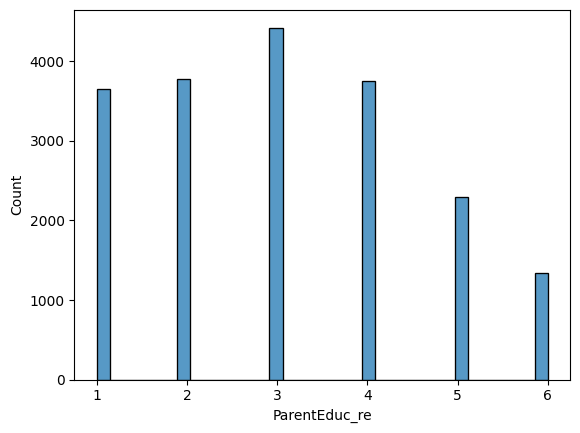

In [83]:
sns.histplot(saturated['ParentEduc_re'])

<Axes: xlabel='WritingScore', ylabel='Count'>

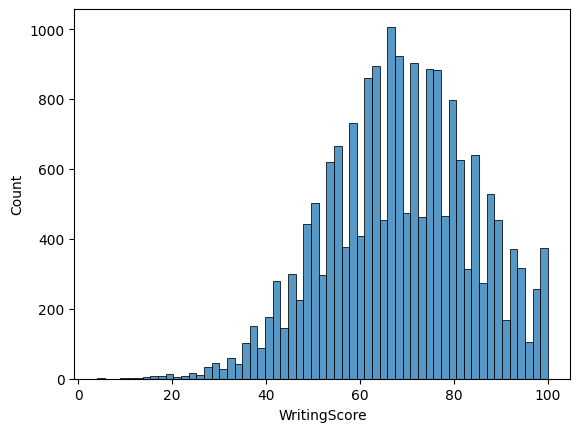

In [84]:
sns.histplot(saturated['WritingScore'])

In [8]:
stats.spearmanr(saturated['ParentEduc_re'],saturated['WritingScore'])

SignificanceResult(statistic=0.24130761264023312, pvalue=5.201817621589927e-253)

<Axes: xlabel='ParentEduc_re', ylabel='WritingScore'>

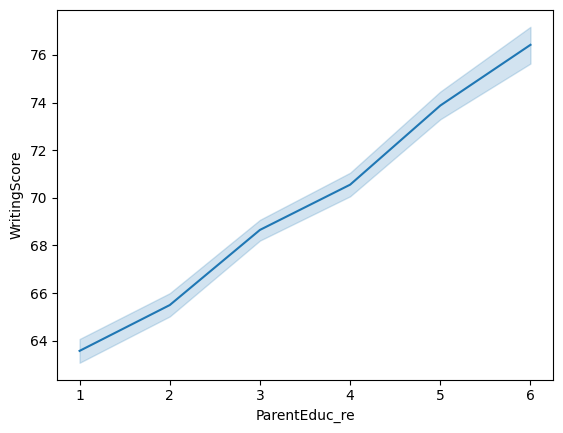

In [22]:
sns.lineplot(x=saturated['ParentEduc_re'],y=saturated['WritingScore'])

In [23]:
saturated['PracticeSport'].unique()

array(['sometimes', 'regularly', 'never'], dtype=object)

In [24]:
def recode_sport(tekst):
    if tekst == 'never':
        return 1
    if tekst == 'sometimes':
        return 2
    if tekst == 'regularly':
        return 3

In [25]:
saturated.loc[:,'PracticeSport_re'] = saturated.loc[:,'PracticeSport'].apply(recode_sport)
saturated['PracticeSport_re']

C:\Users\user\AppData\Local\Temp\ipykernel_15572\929760212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saturated.loc[:,'PracticeSport_re'] = saturated.loc[:,'PracticeSport'].apply(recode_sport)


2        2
4        2
5        3
6        1
7        2
        ..
30635    3
30636    2
30637    3
30639    3
30640    1
Name: PracticeSport_re, Length: 19243, dtype: int64

<Axes: xlabel='PracticeSport_re', ylabel='Count'>

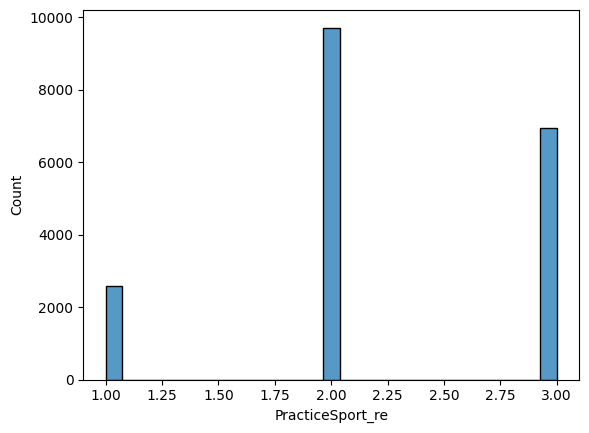

In [85]:
sns.histplot(saturated['PracticeSport_re'])

In [26]:
saturated['WklyStudyHours'].unique()

array(['< 5', '5 - 10', '> 10'], dtype=object)

In [27]:
def recode_study(tekst):
    if tekst == '< 5':
        return 1
    if tekst == '5 - 10':
        return 2
    if tekst == '> 10':
        return 3

In [28]:
saturated.loc[:,'StudyHours_re'] = saturated.loc[:,'WklyStudyHours'].apply(recode_study)
saturated['StudyHours_re']

C:\Users\user\AppData\Local\Temp\ipykernel_15572\3594764461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saturated.loc[:,'StudyHours_re'] = saturated.loc[:,'WklyStudyHours'].apply(recode_study)


2        1
4        2
5        2
6        2
7        3
        ..
30635    2
30636    2
30637    2
30639    2
30640    2
Name: StudyHours_re, Length: 19243, dtype: int64

<Axes: xlabel='StudyHours_re', ylabel='Count'>

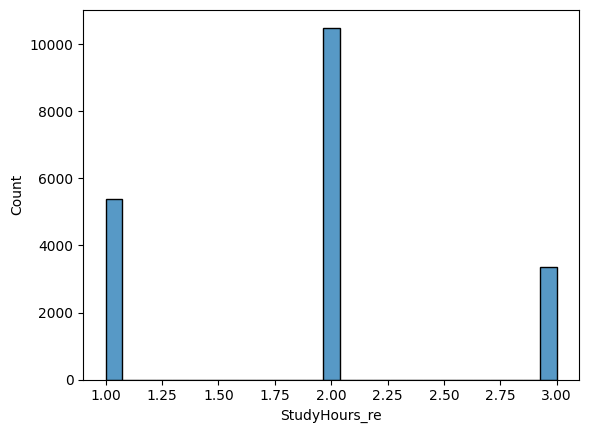

In [86]:
sns.histplot(saturated['StudyHours_re'])

In [29]:
stats.spearmanr(saturated['StudyHours_re'],saturated['PracticeSport_re'])

SignificanceResult(statistic=-0.004602205147452572, pvalue=0.5232290463760121)

<Axes: xlabel='PracticeSport_re', ylabel='StudyHours_re'>

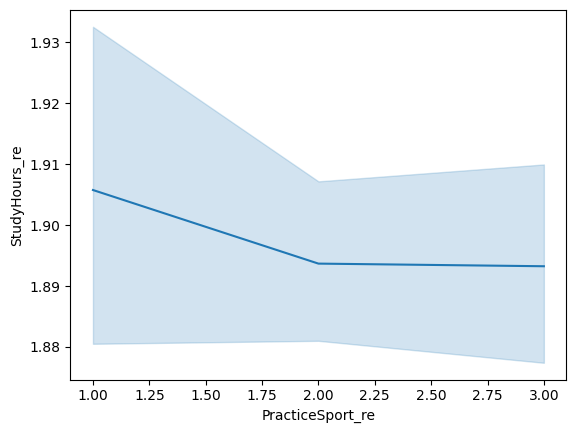

In [30]:
sns.lineplot(x=saturated['PracticeSport_re'],y=saturated['StudyHours_re'])

In [33]:
female =saturated[saturated['Gender']=='female'][saturated['TestPrep']=='completed']['MathScore']

C:\Users\user\AppData\Local\Temp\ipykernel_15572\1864391103.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female =saturated[saturated['Gender']=='female'][saturated['TestPrep']=='completed']['MathScore']


In [31]:
male = saturated[saturated['Gender']=='male'][saturated['TestPrep']=='completed']['MathScore']

C:\Users\user\AppData\Local\Temp\ipykernel_15572\1813952519.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male = saturated[saturated['Gender']=='male'][saturated['TestPrep']=='completed']['MathScore']


In [36]:
stats.shapiro(female)

ShapiroResult(statistic=0.9938347339630127, pvalue=6.98551425037941e-11)

<Axes: xlabel='MathScore', ylabel='Count'>

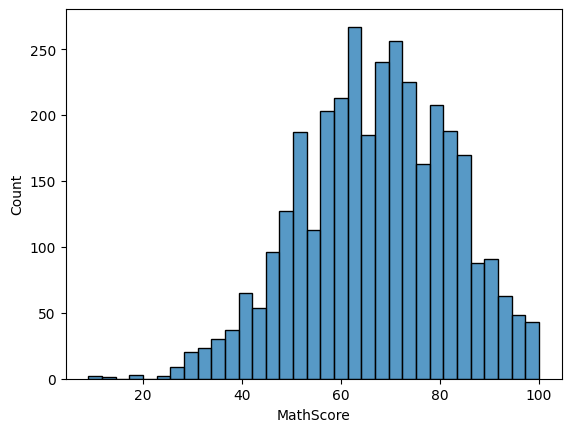

In [34]:
sns.histplot(female)

In [37]:
stats.shapiro(saturated[saturated['Gender']=='male']['MathScore'])

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9933904409408569, pvalue=1.5876872365600135e-20)

<Axes: xlabel='MathScore', ylabel='Count'>

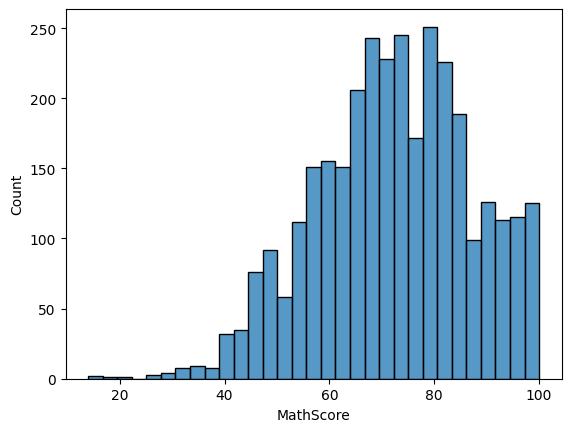

In [35]:
sns.histplot(male)

In [38]:
stats.levene(male,female)

LeveneResult(statistic=0.33066950486160135, pvalue=0.56528456744865)

In [60]:
stats.ttest_ind(male,female,equal_var=True)

TtestResult(statistic=14.217334308680769, pvalue=3.2690425511807534e-45, df=6654.0)

<Axes: xlabel='MathScore', ylabel='Count'>

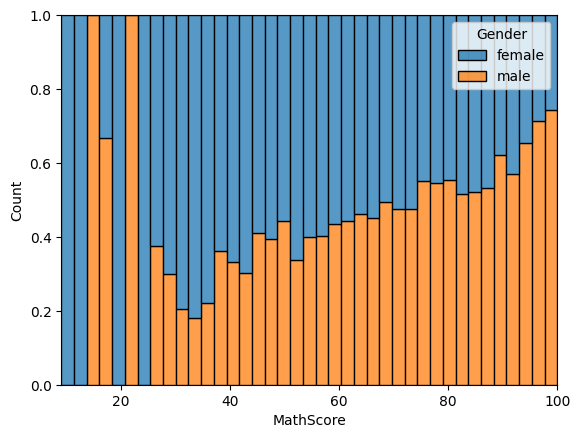

In [52]:
sns.histplot(data=saturated[saturated['TestPrep']=='completed'], x='MathScore' ,hue = 'Gender',multiple = 'fill')

<Axes: xlabel='ReadingScore', ylabel='Count'>

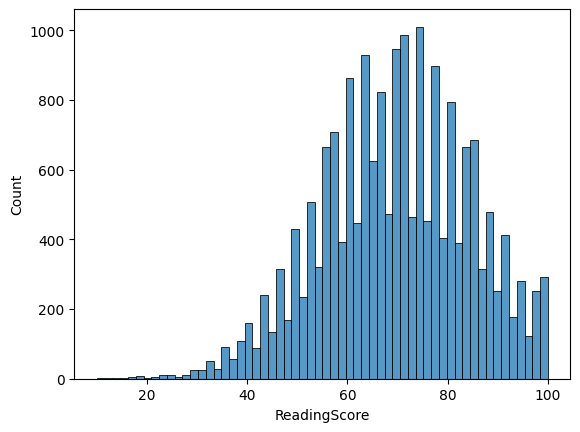

In [53]:
sns.histplot(saturated['ReadingScore'])

In [54]:
stats.shapiro(saturated['ReadingScore'])

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9931230545043945, pvalue=4.946370690994599e-29)

<Axes: xlabel='WritingScore', ylabel='Count'>

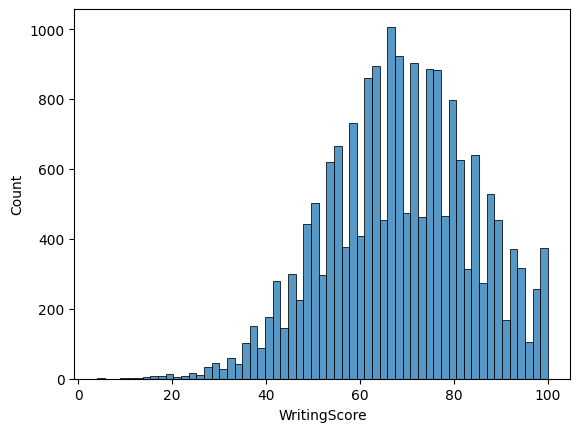

In [57]:
sns.histplot(saturated['WritingScore'])

In [61]:
stats.shapiro(saturated['WritingScore'])

ShapiroResult(statistic=0.9932975769042969, pvalue=1.0806596344307156e-28)

In [62]:
stats.levene(saturated['ReadingScore'],saturated['WritingScore'])

LeveneResult(statistic=35.63146776970502, pvalue=2.404882879957167e-09)

In [63]:
stats.pearsonr(saturated['ReadingScore'],saturated['WritingScore'])

PearsonRResult(statistic=0.9526214776686228, pvalue=0.0)

<Axes: xlabel='ReadingScore', ylabel='WritingScore'>

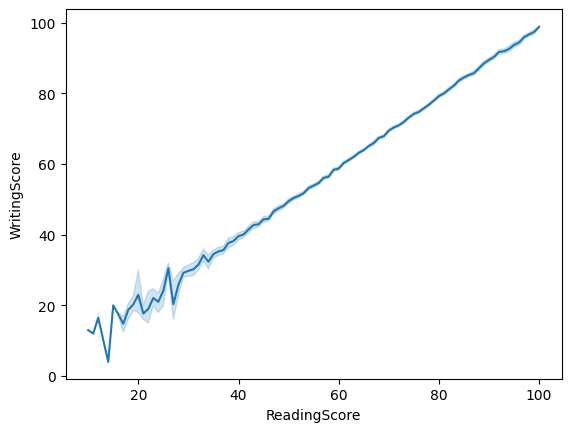

In [65]:
sns.lineplot(x=saturated['ReadingScore'],y=saturated['WritingScore'])

In [67]:
saturated['TransportMeans'].unique()

array(['school_bus', 'private'], dtype=object)

<Axes: xlabel='TransportMeans', ylabel='Count'>

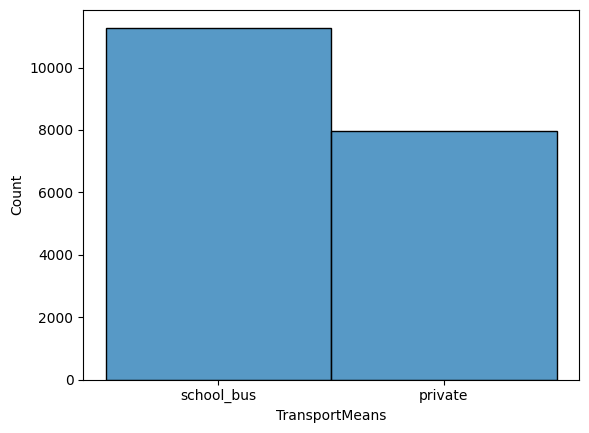

In [113]:
sns.histplot(saturated['TransportMeans'])

In [87]:
saturated['rodzenstwo'] = np.zeros(len(saturated))

C:\Users\user\AppData\Local\Temp\ipykernel_15572\1573116894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saturated['rodzenstwo'] = np.zeros(len(saturated))


In [107]:
def recode_siblings(liczba):
    if liczba >= 1:
        return 'Posiada Rodzeńśtwa'
    else:
        return 'Brak rodzeństwa'

In [108]:
saturated.loc[:,'Rodzeństwo'] = saturated.loc[:,'NrSiblings'].apply(recode_siblings)
saturated['Rodzeństwo']

2        Posiada Rodzeńśtwa
4           Brak rodzeństwa
5        Posiada Rodzeńśtwa
6        Posiada Rodzeńśtwa
7        Posiada Rodzeńśtwa
                ...        
30635    Posiada Rodzeńśtwa
30636    Posiada Rodzeńśtwa
30637    Posiada Rodzeńśtwa
30639    Posiada Rodzeńśtwa
30640    Posiada Rodzeńśtwa
Name: Rodzeństwo, Length: 19243, dtype: object

<Axes: xlabel='Rodzeństwo', ylabel='Count'>

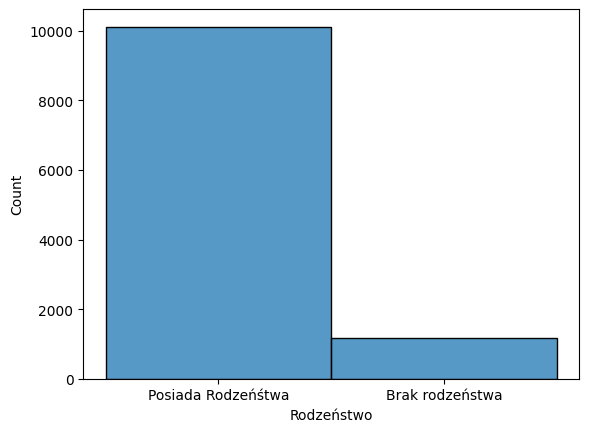

In [109]:
sns.histplot(saturated[saturated['TransportMeans']=='school_bus']['Rodzeństwo'])

In [110]:
tabela = pd.crosstab(saturated['TransportMeans'],saturated['Rodzeństwo'])
tabela

Rodzeństwo,Brak rodzeństwa,Posiada Rodzeńśtwa
TransportMeans,,
private,830,7133
school_bus,1163,10117


In [111]:
stats.chi2_contingency(tabela)

Chi2ContingencyResult(statistic=0.05252496972858909, pvalue=0.8187264777366946, dof=1, expected_freq=array([[  824.72894039,  7138.27105961],
       [ 1168.27105961, 10111.72894039]]))

<Axes: xlabel='Rodzeństwo', ylabel='Count'>

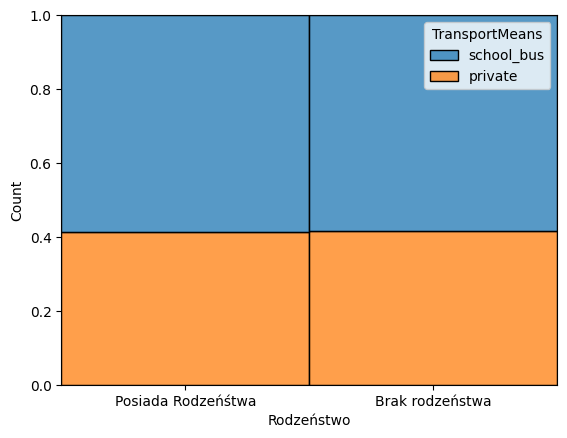

In [112]:
sns.histplot(data=saturated, x='Rodzeństwo' ,hue = 'TransportMeans',multiple = 'fill')